In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.cluster as sklc

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [3]:
cl=pd.read_csv('ASD_PH2.csv')
cl.tail()

,Timestamp,Name,Age,Gender,Ethnicity,Country,A1,A2,A3,A4,...,A6,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res
92,3/15/2019 22:57:24,Aditi Vinay,28,0,Indian,India,0,0,1,0,...,1,0,0,0,1,1,0,2,0,3
93,3/15/2019 22:58:33,Afham Mohammed,34,1,Indian,India,1,1,1,0,...,1,0,0,0,1,0,1,2,1,6
94,3/15/2019 23:00:00,Neeharika Patel,34,0,Indian,India,0,1,1,0,...,1,0,0,0,1,1,0,2,1,5
95,3/15/2019 23:01:01,Yaseen Khan,40,1,Indian,India,0,1,1,0,...,1,0,1,0,1,0,0,2,0,5
96,3/15/2019 23:08:51,Shreyas Dani,33,1,Indian,India,1,0,0,0,...,1,0,1,1,1,1,0,1,1,6


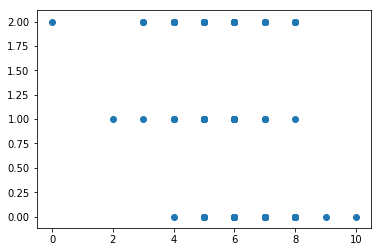

In [6]:
plt.scatter(cl['Res'],cl['BISE'])

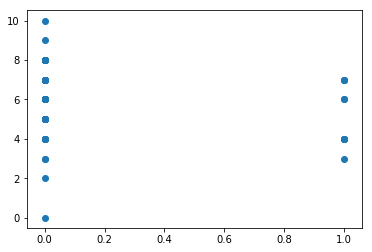

In [7]:
plt.scatter(cl['PDIS'],cl['Res'])

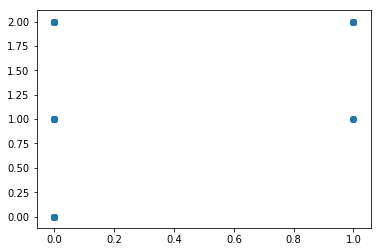

In [6]:
plt.scatter(cl['PDIS'],cl['BISE'])

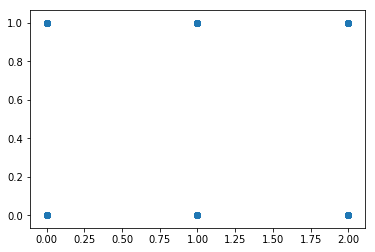

In [74]:
plt.scatter(cl['BISE'],cl['Gender'])

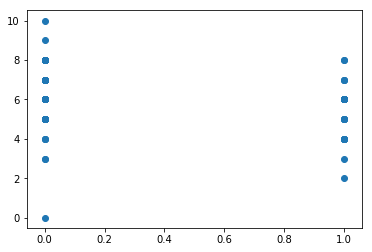

In [7]:
plt.scatter(cl['Anyone in the family has Autism?'],cl['Res'])

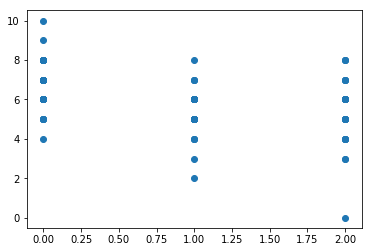

In [8]:
plt.scatter(cl['BISE'],cl['Res'])

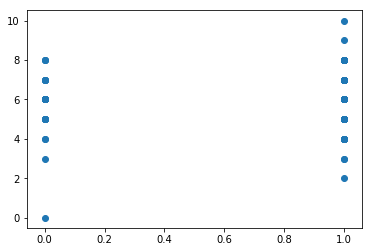

In [9]:
plt.scatter(cl['Gender'],cl['Res'])

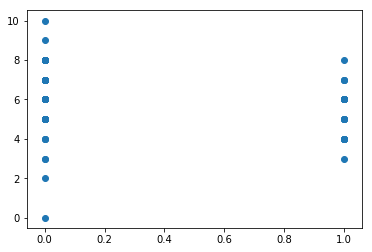

In [10]:
plt.scatter(cl['Jaundice'],cl['Res'])

In [4]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
y_predicted=km.fit_predict(cl[['BISE','Res']])
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0])

In [56]:
cl['cluster']=y_predicted
cl


,Timestamp,Name,Age,Gender,Ethnicity,Country,A1,A2,A3,A4,...,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res,cluster
0,2/25/2019 16:51:28,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,1,0,5,1
1,2/25/2019 16:54:51,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,1
2,2/25/2019 16:55:40,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,1
3,2/25/2019 18:34:44,anirudh,24,1,INDIAN,India,1,1,0,0,...,1,0,1,1,0,0,1,0,7,0
4,2/25/2019 18:36:02,arya,27,1,INDIAN,India,0,0,0,1,...,1,0,1,1,0,0,0,0,5,1
5,2/25/2019 19:29:12,Ani,23,1,INDIAN,INDIA,0,1,1,0,...,1,0,1,0,1,0,1,0,5,1
6,2/25/2019 19:35:51,God,22,1,all,everywhere,0,1,0,1,...,0,0,1,1,0,0,2,0,4,1
7,2/25/2019 19:38:12,Redacted,35,1,Redacted,Redacted,1,0,0,1,...,1,1,1,0,0,0,1,0,7,0
8,2/25/2019 19:51:25,Avisha Hadalamborghini,69,0,KKK,Lingaraj Puram,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
9,2/25/2019 19:53:07,Jayanth,50,1,Asian,Pakiatan,1,0,0,1,...,1,1,1,1,0,1,2,0,7,0


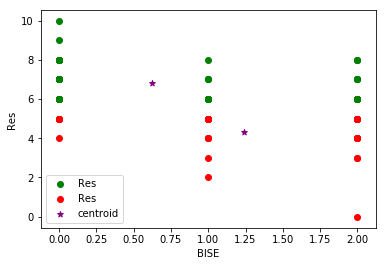

In [34]:
cl1=cl[cl.cluster==0]
cl2=cl[cl.cluster==1]



plt.scatter(cl1['BISE'],cl1['Res'],color='green')
plt.scatter(cl2['BISE'],cl2['Res'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('BISE')
plt.ylabel('Res')
plt.legend()

In [127]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(cl[['Jaundice','BISE']])
cl['cluster']=y_predicted
y_predicted



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
km.cluster_centers_

array([[0.625     , 6.796875  ],
       [1.24242424, 4.3030303 ]])

In [128]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(cl[['Jaundice','BISE']])
    sse.append(km.inertia_)

C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


In [88]:
sse

[37.87628865979381,
 14.300202839756587,
 5.217391304347824,
 1.0410806907379642e-29,
 1.0410806907379642e-29,
 1.0410806907379642e-29,
 1.0410806907379642e-29,
 1.0410806907379642e-29,
 9.4755753263852e-30]

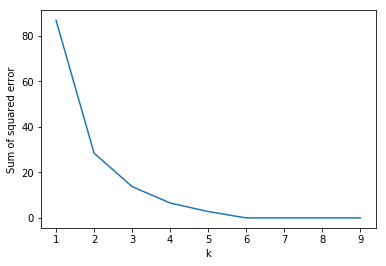

In [129]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [198]:
feature_cols=['Age','PDIS','Res','BISE','Jaundice']
x=cl[feature_cols]
y=cl.cluster

In [199]:
#here we split the originial dataset into training set and testing set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [200]:
#train the model by importing LOGISTICREGRESSION and feed the data.
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
y_pred_class=logreg.predict(x_test)

In [202]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred_class) *100) 

96.0


In [162]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
import numpy as np


sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski') 
knn = knn.fit(x_train_std, y_train)            

from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred_knn = knn.predict(x_test_std)
y_pred_insample = knn.predict(x_train_std)


print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_knn))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))


print('F1 score (out-of-sample): ', f1_score(y_test, y_pred_knn, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))


print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_knn))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))


print(classification_report(y_test, y_pred_class, target_names=["Autistic", "Non-Autistic"]))
knn_matrix = confusion_matrix(y_test, y_pred_knn)
print (knn_matrix)

Accuracy (out-of-sample): 0.92
Accuracy (in-sample): 0.99
F1 score (out-of-sample):  0.9188311688311688
F1 score (in-sample)    :  0.9859785783836417
Kappa score (out-of-sample):  0.8376623376623377
Kappa score (in-sample)    :  0.9719626168224299
              precision    recall  f1-score   support

    Autistic       1.00      1.00      1.00        14
Non-Autistic       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[13  1]
 [ 1 10]]


C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vishnusourabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\vishnusourabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
